# GB1 analysis 


In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import evoVAE.utils.seq_tools as st
import numpy as np
import logomaker as lm

%matplotlib inline

In [76]:
meta = pd.read_csv("/Users/sebs_mac/git_repos/dms_data/DMS_substitutions.csv")
print(meta.columns)
meta[meta["DMS_id"] == "SPG1_STRSG_Wu_2016"]["target_seq"].values[0]
meta[meta["DMS_id"] == "SPG1_STRSG_Olson_2014"]["target_seq"].values[0]

Index(['DMS_id', 'DMS_filename', 'UniProt_ID', 'taxon', 'source_organism',
       'target_seq', 'seq_len', 'includes_multiple_mutants',
       'DMS_total_number_mutants', 'DMS_number_single_mutants',
       'DMS_number_multiple_mutants', 'DMS_binarization_cutoff',
       'DMS_binarization_method', 'first_author', 'title', 'year', 'jo',
       'region_mutated', 'molecule_name', 'selection_assay', 'selection_type',
       'MSA_filename', 'MSA_start', 'MSA_end', 'MSA_len', 'MSA_bitscore',
       'MSA_theta', 'MSA_num_seqs', 'MSA_perc_cov', 'MSA_num_cov', 'MSA_N_eff',
       'MSA_Neff_L', 'MSA_Neff_L_category', 'MSA_num_significant',
       'MSA_num_significant_L', 'raw_DMS_filename', 'raw_DMS_phenotype_name',
       'raw_DMS_directionality', 'raw_DMS_mutant_column', 'weight_file_name',
       'pdb_file', 'ProteinGym_version', 'raw_mut_offset',
       'coarse_selection_type'],
      dtype='object')


'MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRNGGELTNLLGNSETTLALRNEESATADLTAAAVADTVAAAAAENAGAAAWEAAAAADALAKAKADALKEFNKYGVSDYYKNLINNAKTVEGIKDLQAQVVESAKKARISEATDGLSDFLKSQTPAEDTVKSIELAEAKVLANRELDKYGVSDYHKNLINNAKTVEGVKELIDEILAALPKTDQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDDATKTFTVTEKPEVIDASELTPAVTTYKLVINGKTLKGETTTKAVDAETAEKAFKQYANDNGVDGVWTYDDATKTFTVTEMVTEVPGDAPTEPEKPEASIPLVPLTPATPIAKDDAKKDDTKKEDAKKPEAKKDDAKKAETLPTTGEGSNPFFTAAALAVMAGAGALAVASKRKED'

The following residues were modified
V39, 
D40
G41 
V54

They all lie within 15 residues of each other 

The distribution of data is very skewed though
"While most mutants had a lower fitness compared to WT (fitness < 1), 2.4% of mutants were beneficial (fitness > 1)."

In [38]:
gb1_variants = pd.read_csv("/Users/sebs_mac/git_repos/dms_data/DMS_ProteinGym_substitutions/SPG1_STRSG_Wu_2016.csv")
gb1_variants.head()

,mutant,mutated_sequence,DMS_score,DMS_score_bin
0,D266A,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,2.401243,1
1,D266A:G267A,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,0.259549,1
2,D266A:G267A:V280A,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,6.201135,1
3,D266A:G267A:V280C,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,2.705083,1
4,D266A:G267A:V280E,MEKEKKVKYFLRKSAFGLASVSAAFLVGSTVFAVDSPIEDTPIIRN...,0.004726,0


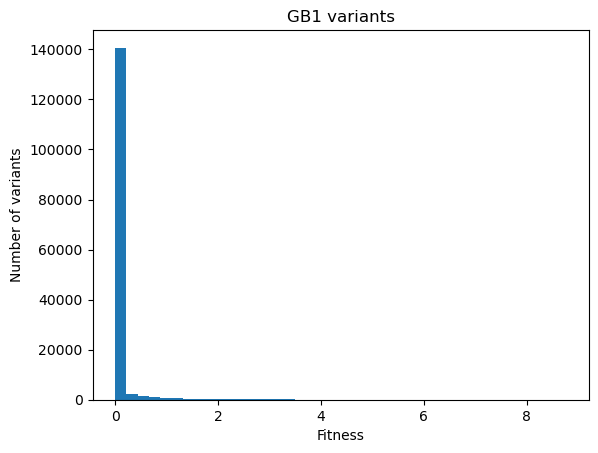

In [40]:
gb1_variants["DMS_score"].describe()

plt.hist(gb1_variants["DMS_score"], bins=40)
plt.ylabel("Number of variants")
plt.xlabel("Fitness")
plt.title("GB1 variants")
plt.show()

In [158]:
aln_path = "/Users/sebs_mac/uni_OneDrive/honours/data/gb1/alns/"
gb1_e = pd.read_pickle(aln_path + "gb1_extants_no_dupes.pkl")
gb1_a = pd.read_pickle(aln_path + "gb1_ancestors_no_dupes.pkl")

gb1_extant_seqs = [x for x in gb1_e["sequence"]]
gb1_ancestor_seqs = [x for x in gb1_a["sequence"]]

data = [gb1_extant_seqs, gb1_ancestor_seqs]
labels = ["GB1 extant MSA", "GB1 ancestor MSA"]

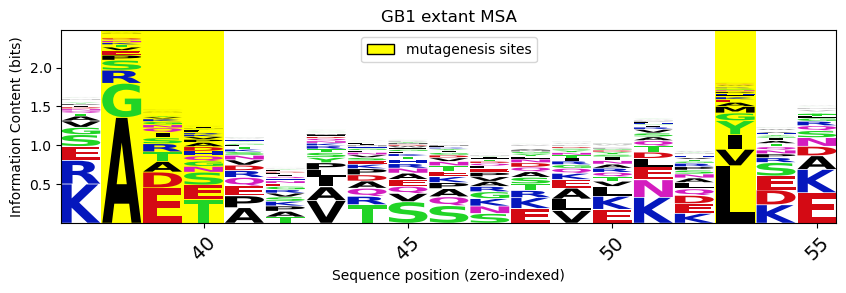

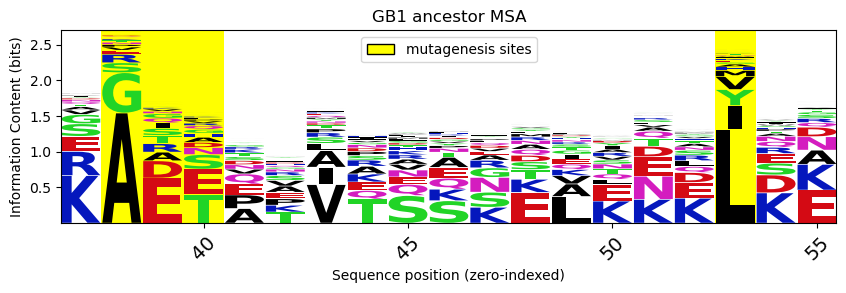

In [204]:
from matplotlib.patches import Patch

for d, l in zip(data, labels):

    counts_mat = lm.alignment_to_matrix(d)
    counts_mat = counts_mat.iloc[37:56]


    info_mat = lm.transform_matrix(counts_mat, 
                                        from_type='counts', 
                                        to_type='information')
    
    logo = lm.Logo(info_mat,
                stack_order='small_on_top',
                vsep=0.01
                )

    logo.highlight_position_range(38,40,alpha=1, color='yellow')
    logo.highlight_position(53,color='yellow',alpha=1)
    logo.style_xticks(spacing=5, anchor=25, rotation=45, fmt='%d', fontsize=14)
    logo.ax.set_ylabel("Information Content (bits)")
    logo.ax.set_xlabel("Sequence position (zero-indexed)")
    logo.ax.set_title(l)

    legend_elements = [
        Patch(facecolor='yellow', edgecolor='black', label='mutagenesis sites'),
    ]

    # Step 3: Add the legend to the plot
    plt.legend(handles=legend_elements, loc='upper center')
    plt.show()




            A         C         D         E         F         G         H  \
pos                                                                         
37   0.037180  0.000483  0.009657  0.118783  0.002897  0.058909  0.001449   
38   0.590164  0.000512  0.003586  0.021516  0.000512  0.188012  0.001025   
39   0.099442  0.000507  0.151700  0.351598  0.001522  0.023846  0.003551   
40   0.042640  0.000508  0.044670  0.162944  0.003046  0.054822  0.048223   
41   0.207404  0.000507  0.064909  0.128296  0.001521  0.010649  0.002535   
42   0.121074  0.000507  0.017224  0.052685  0.023303  0.062310  0.037487   
43   0.165094  0.000524  0.013103  0.004717  0.010482  0.002096  0.001048   
44   0.095829  0.000564  0.081172  0.041150  0.018038  0.018038  0.015784   
45   0.079412  0.000588  0.011176  0.088824  0.014118  0.018235  0.054118   
46   0.111565  0.000584  0.029206  0.071846  0.002921  0.025701  0.001752   
47   0.079718  0.000542  0.023861  0.052061  0.009219  0.110629  0.002169   

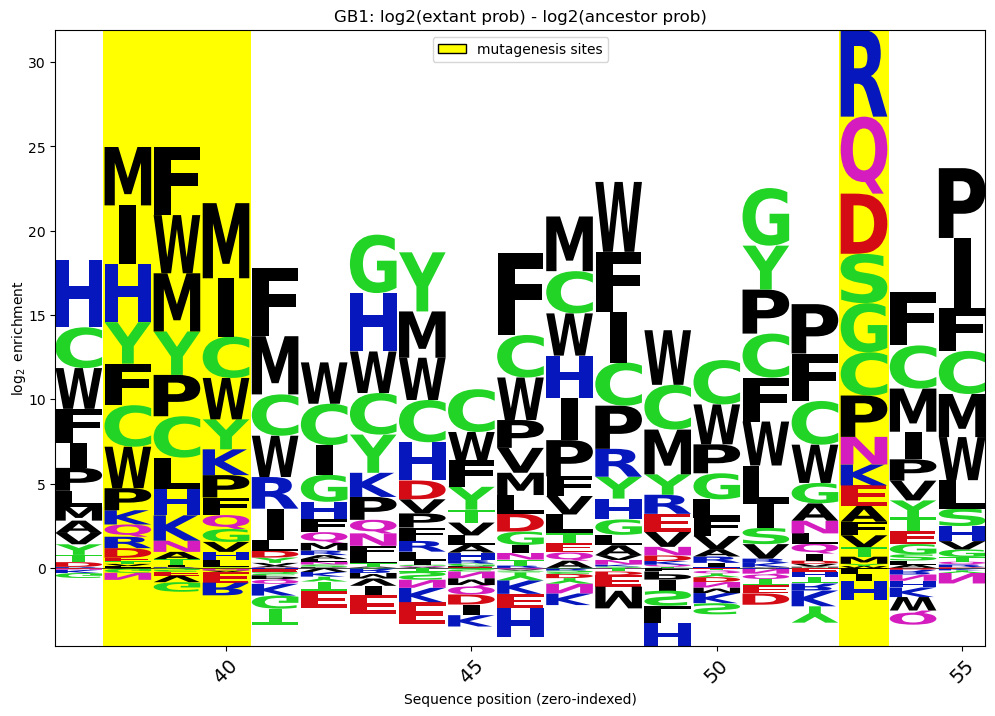

In [213]:
EXTANT = 0 
ANC = 1

mats = []
for d, l in zip(data, labels):

    counts_mat = lm.alignment_to_matrix(d)
    counts_mat = counts_mat.iloc[37:56]

    info_mat = lm.transform_matrix(counts_mat, 
                                        from_type='counts', 
                                        to_type='probability')
    
    mats.append(info_mat)
    print(info_mat)
    
info_mat = np.log2(mats[EXTANT]) - np.log2(mats[ANC])
logo = lm.Logo(info_mat, figsize=(12,8))

logo.highlight_position_range(38,40,alpha=1, color='yellow')
logo.highlight_position(53,color='yellow',alpha=1)
logo.style_xticks(spacing=5, anchor=25, rotation=45, fmt='%d', fontsize=14)
logo.ax.set_ylabel("$\log_2$ enrichment")
logo.ax.set_xlabel("Sequence position (zero-indexed)")
logo.ax.set_title("GB1: log2(extant prob) - log2(ancestor prob)")
# style using Axes methods

logo.ax.set_ylabel('$\log_2$ enrichment', labelpad=0)

legend_elements = [
    Patch(facecolor='yellow', edgecolor='black', label='mutagenesis sites'),
]

# Step 3: Add the legend to the plot
plt.legend(handles=legend_elements, loc='upper center')

plt.show()

In [198]:
ars_df = lm.get_example_matrix('ars_enrichment_matrix',
                                      print_description=False)

In [200]:
ars_df

,A,C,G,T
pos,,,,
0,0.062890,-0.174578,-0.088277,0.199965
1,0.505312,-0.380521,-0.099303,-0.025489
2,0.324956,-0.223689,-0.222386,0.121119
3,-0.062756,-0.117432,0.004756,0.175432
4,-0.000039,0.108658,-0.259813,0.151193
...,...,...,...,...
145,0.141620,0.005294,-0.212453,0.065539
146,0.224772,-0.251431,-0.141586,0.168245
147,0.038111,0.339961,-0.137034,-0.241038
